In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('bmh')
import paramselect
import os
import fnmatch
def recursive_glob(start, pattern):
    matches = []
    for root, dirnames, filenames in os.walk(start):
        for filename in fnmatch.filter(filenames, pattern):
            matches.append(os.path.join(root, filename))
    return matches

datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))

In [2]:
from paramselect import fit
dbf = fit('input.json', datasets)
print(dbf.to_string(fmt='tdb'))

16 endmembers (5 distinct by symmetry)
ENDMEMBER: ('AL', 'AL', 'AL', 'AL', 'VA')
datasets found:  0
SYMMETRIC_ENDMEMBERS:  [('AL', 'AL', 'AL', 'AL', 'VA')]
ENDMEMBER: ('AL', 'AL', 'AL', 'NI', 'VA')
datasets found:  0
SYMMETRIC_ENDMEMBERS:  [('AL', 'AL', 'AL', 'NI', 'VA'), ('AL', 'AL', 'NI', 'AL', 'VA'), ('AL', 'NI', 'AL', 'AL', 'VA'), ('NI', 'AL', 'AL', 'AL', 'VA')]
ENDMEMBER: ('AL', 'AL', 'NI', 'NI', 'VA')
datasets found:  0
SYMMETRIC_ENDMEMBERS:  [('AL', 'AL', 'NI', 'NI', 'VA'), ('AL', 'NI', 'NI', 'AL', 'VA'), ('NI', 'AL', 'AL', 'NI', 'VA'), ('NI', 'NI', 'AL', 'AL', 'VA')]
ENDMEMBER: ('AL', 'NI', 'NI', 'NI', 'VA')
(T*log(T),) rss: 5.67271997875 AIC: 113.082797874
(T*log(T), T**2) rss: 0.137679848376 AIC: -122.900750615
(T*log(T), T**2, 1/T) rss: 0.0340600362496 AIC: -210.296354526
(T*log(T), T**2, 1/T, T**3) rss: 0.00463296494425 AIC: -335.971727303
(T,) rss: 0.000894830405893 AIC: -447.208086289
datasets found:  2
DATA QUANTITIES 2 [-42170.4   -42170.4   -42179.675 -42188.95  -42198

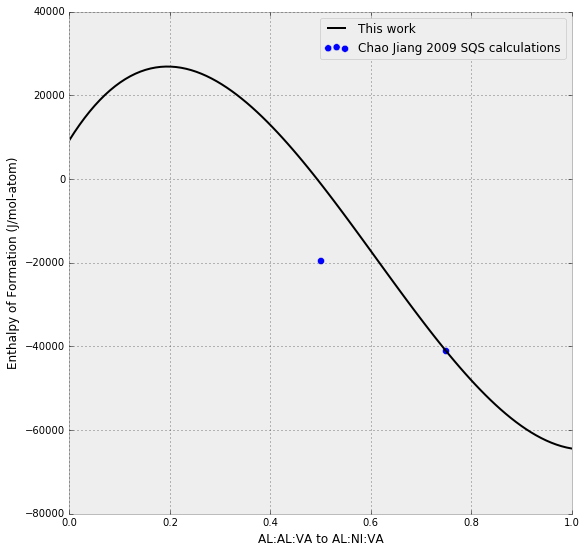

In [3]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["AL", ["AL", "NI"], "VA"], [[0, 1]], datasets)

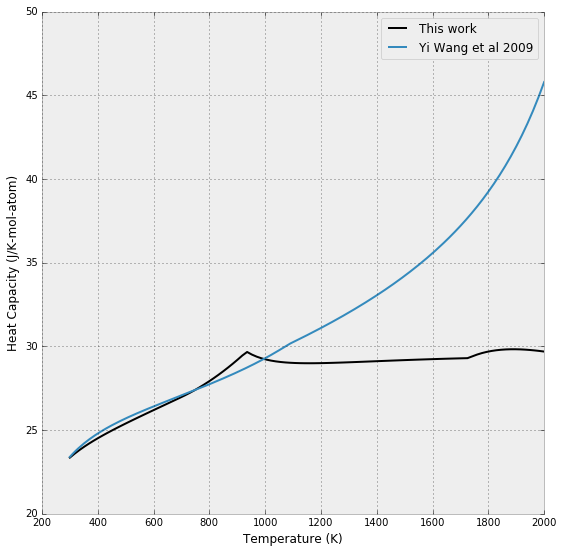

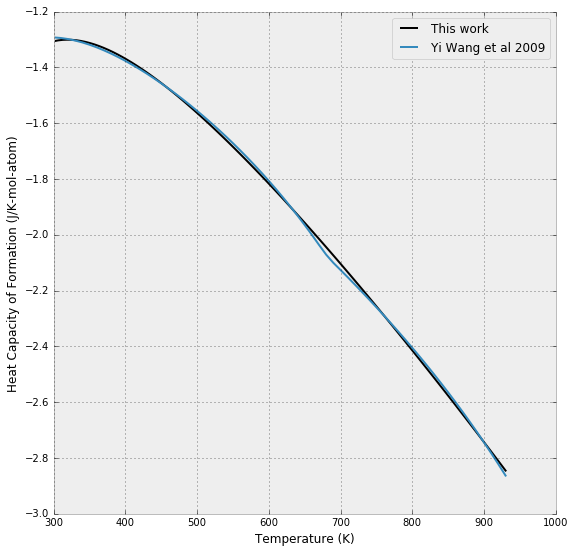

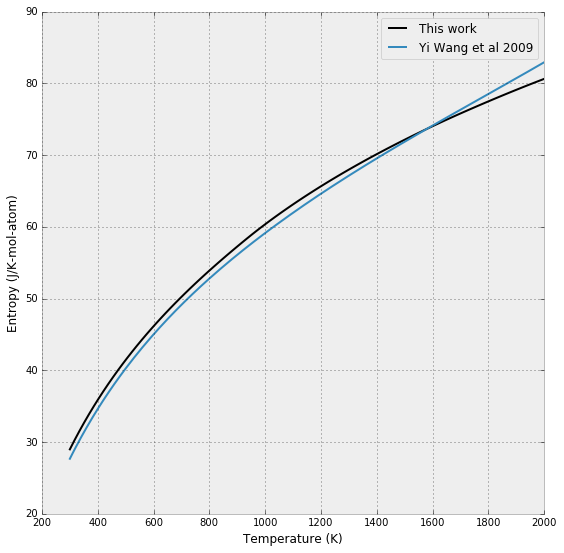

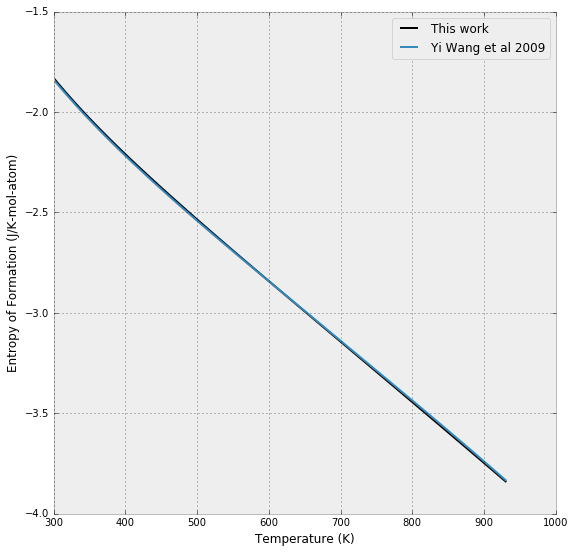

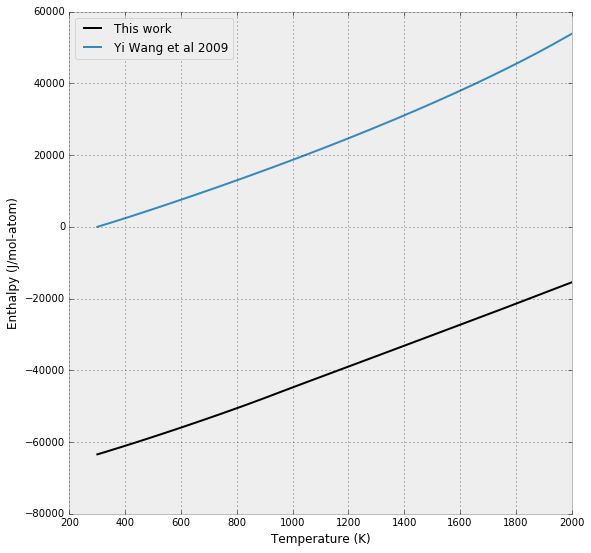

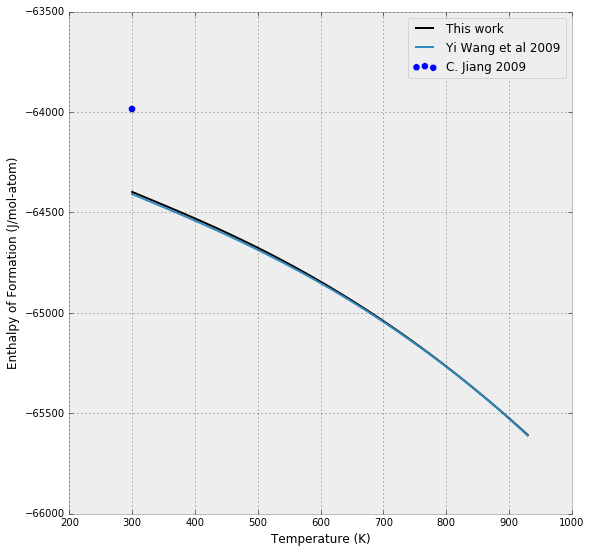

In [4]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["AL", "NI", "VA"], [[0, 1]], datasets)

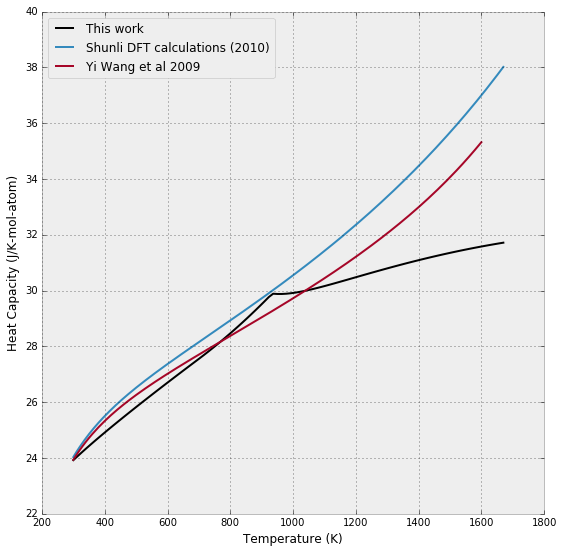

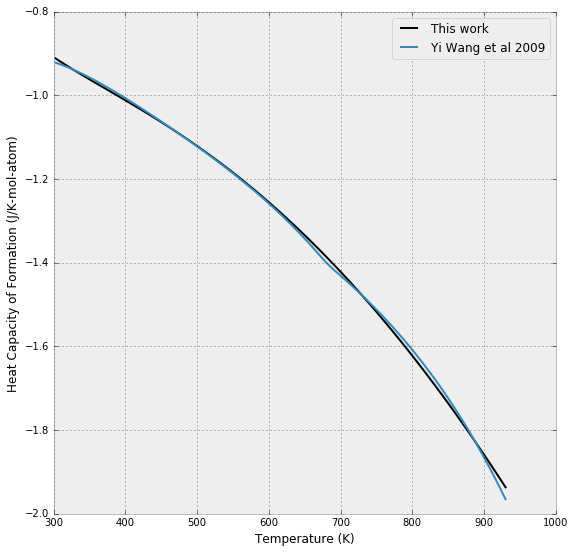

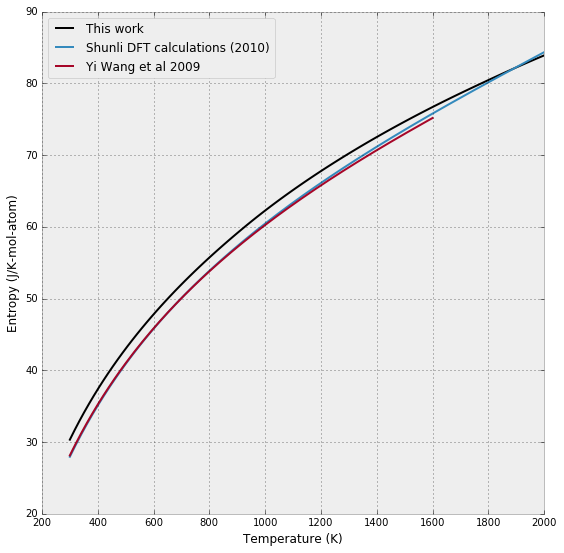

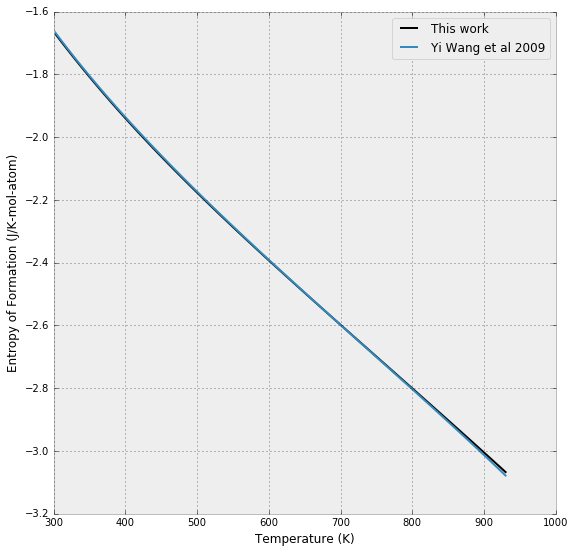

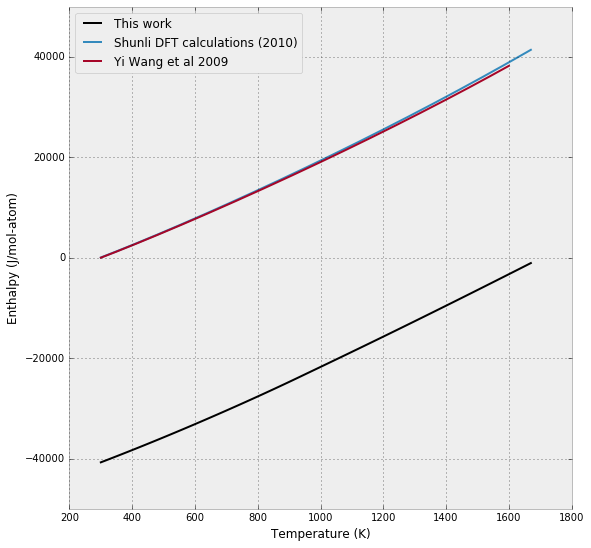

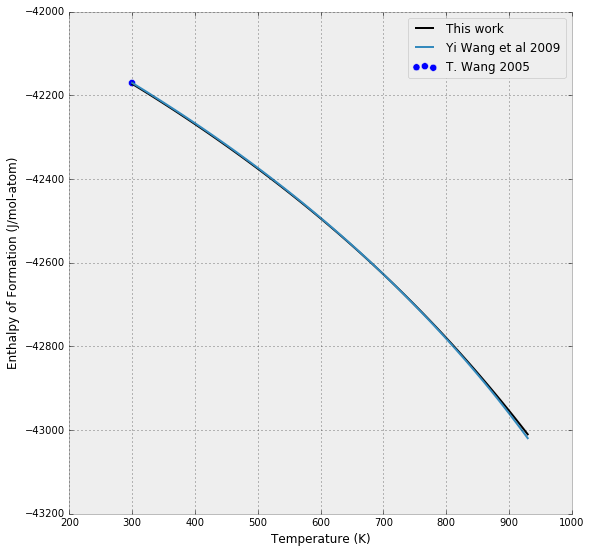

In [5]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", ["AL", "NI", "NI", "NI", "VA"], [[0,1,2,3]], datasets)

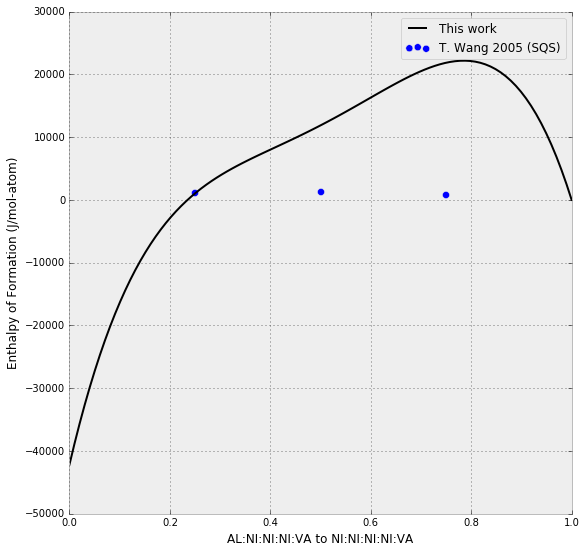

In [6]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], "NI", "NI", "NI", "VA"], [[0,1,2,3]], datasets)

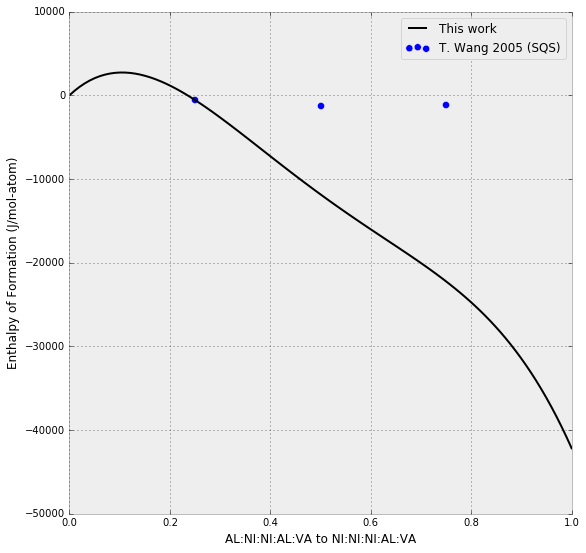

In [7]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], "NI", "NI", "AL", "VA"], [[0,1,2,3]], datasets)

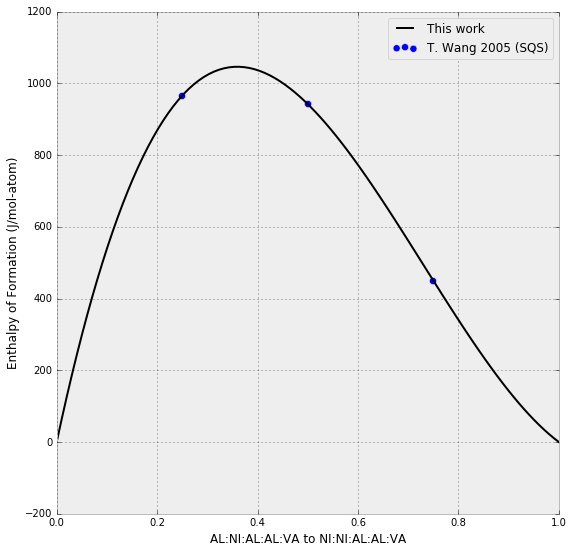

In [8]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], "NI", "AL", "AL", "VA"], [[0,1,2,3]], datasets)

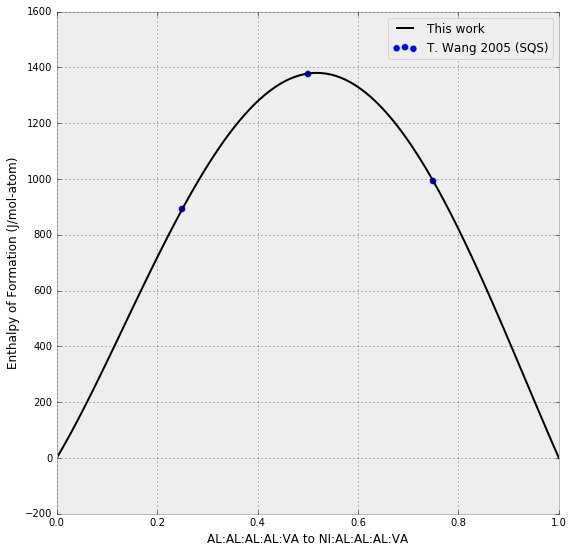

In [9]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], "AL", "AL", "AL", "VA"], [[0,1,2,3]], datasets)